In [43]:
import stream as st
import scanpy as sc

In [41]:
ls ../results/*loom

../results/tumor24_seurat_vel_monocle_obj.loom


In [42]:
adata = sc.read_loom('../results/tumor24_seurat_vel_monocle_obj.loom')

/data/pinello/SHARED_SOFTWARE/anaconda3/envs/alvin_py36_stream/lib/python3.6/site-packages/loompy/loom_layer.py:116: RuntimeWarning: invalid value encountered in greater
  nonzeros = np.where(vals > 0)


In [82]:
adata.obs['label']=adata.obs['seurat_clusters']

In [84]:
adata.obs['label'].shape

(2537,)

In [ ]:
adata.obs['seurat_clusters'].head()

In [45]:
st.add_cell_colors(adata) ## This is key to add cell labels by cluster or cell types

No cell color file is provided, random color is generated for each cell label


In [46]:
adata.obsm

AxisArrays with keys: pca_cell_embeddings, tsne_cell_embeddings, umap_cell_embeddings

In [55]:
adata.obsm['top_pcs'] = adata.obsm['pca_cell_embeddings']
adata.obsm['X_dr'] = adata.obsm['umap_cell_embeddings']
adata.uns['workdir'] = 'test'

In [62]:
## This is necessary step for a descent epigraph construction
st.dimension_reduction(adata, method='se', feature='top_pcs') 
# adata.obsm['X_vis_umap'] =  adata.obsm['umap_cell_embeddings']
# adata.obsm['X_vis_umap']

feature top_pcs is being used ...
44 cpus are being used ...


In [81]:
adata.obsm['top_pcs'].shape

(2537, 50)

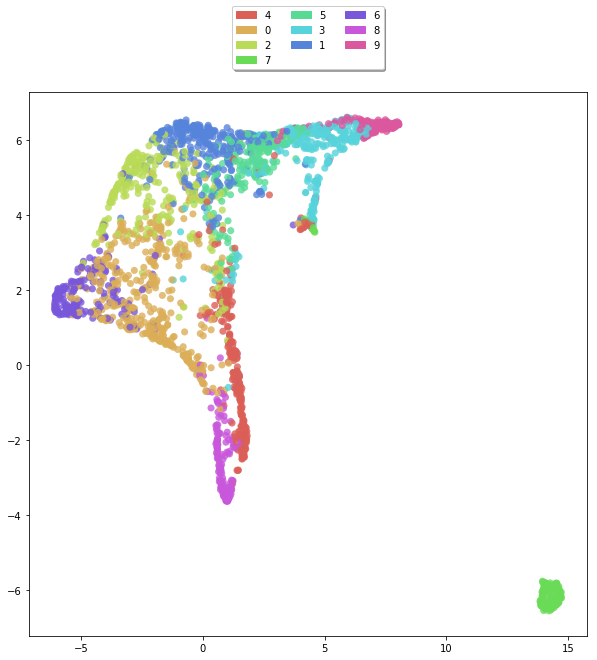

In [65]:
# st.plot_visualization_2D(adata,use_precomputed=False,nb_pct=0.5)
st.plot_visualization_2D(adata,use_precomputed=False,nb_pct=0.5)

In [66]:
st.seed_elastic_principal_graph(adata)

Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 10
Calculatng minimum spanning tree...
Number of initial branches: 6


In [67]:
st.elastic_principal_graph(adata)

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 2537 points and 3 dimensions"


[1]
 "Using a single core"


Nodes = 
10
 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

3||50
	
2.815e-07
	
50
	
49
	
42
	
3
	
0
	
0
	
1.557e-07
	
1.48e-07
	
0.971
	
0.9725
	
1.179e-07
	
7.875e-09
	
3.938e-07
	
1.969e-05
	
0


36.738 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 7


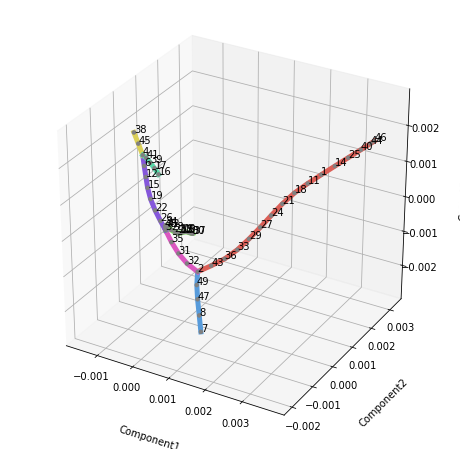

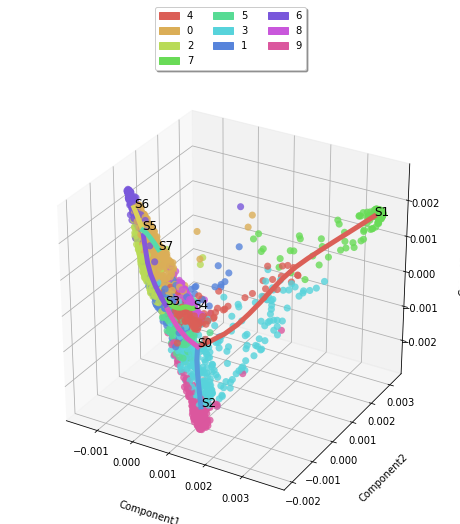

In [68]:
st.plot_branches(adata)
st.plot_branches_with_cells(adata)

Importing precomputed umap visualization ...
Importing precomputed umap visualization ...


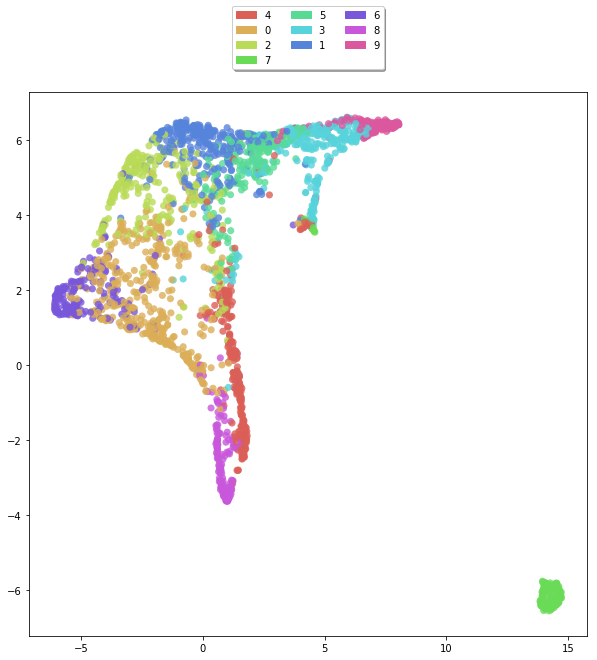

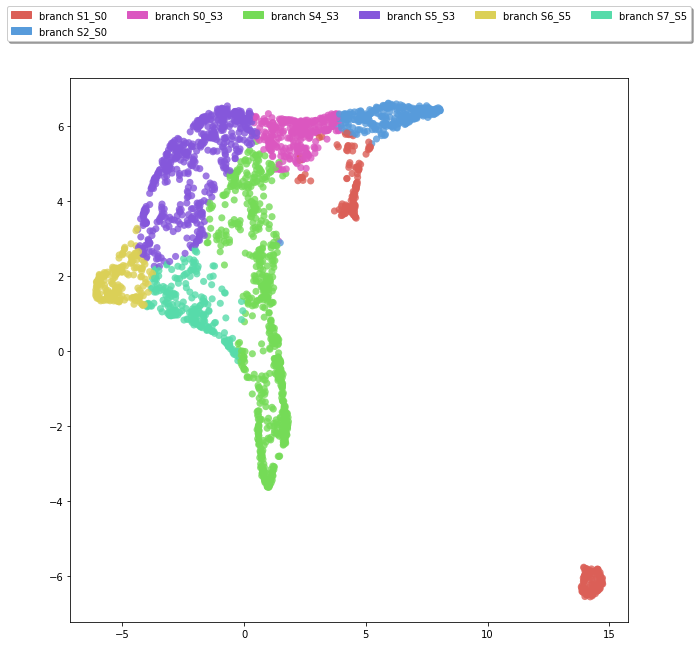

In [69]:
st.plot_visualization_2D(adata)
st.plot_visualization_2D(adata,color_by='branch',fig_legend_ncol=6)

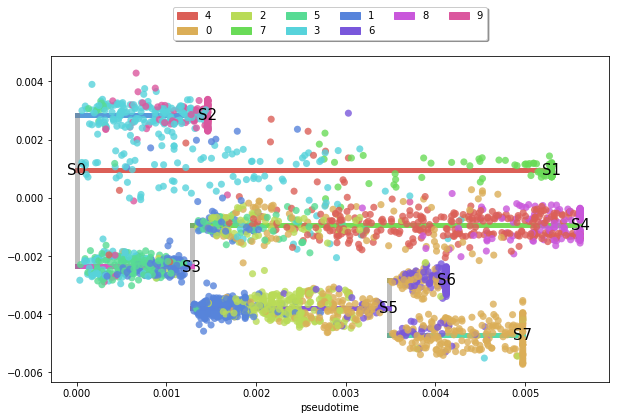

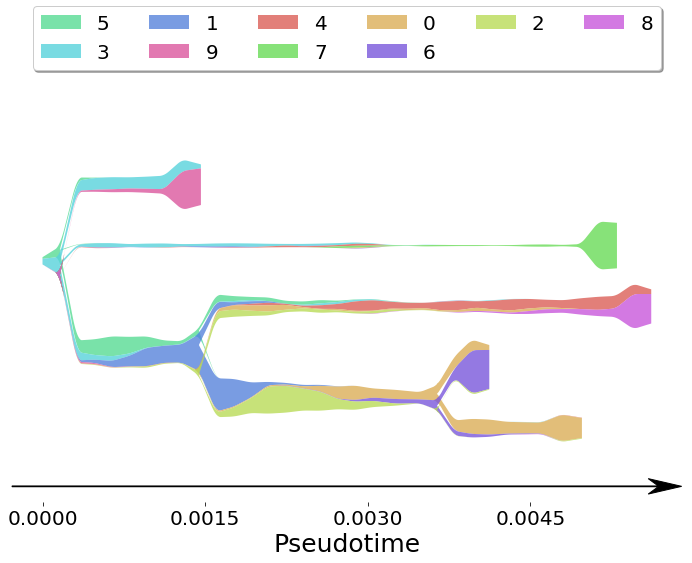

In [70]:
st.subwaymap_plot(adata,root='S0',fig_legend_ncol=6) 
st.stream_plot(adata,root='S0',fig_legend_ncol=6) 

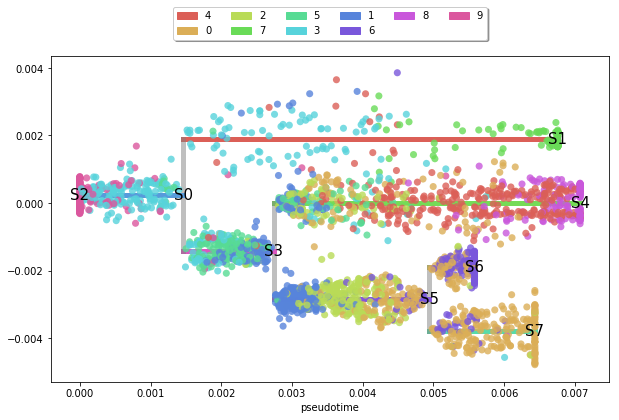

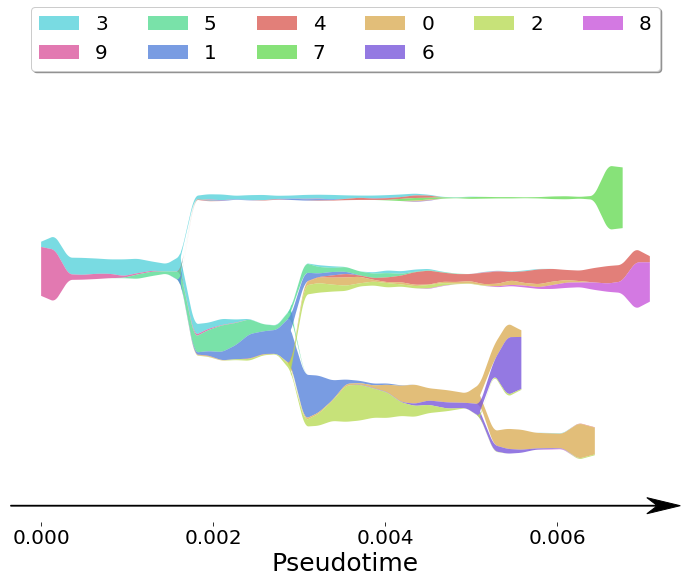

In [71]:
st.subwaymap_plot(adata,root='S2',fig_legend_ncol=6)
st.stream_plot(adata,root='S2',fig_legend_ncol=6) 

In [72]:
adata.uns['label_color']

{'4': '#db5f57',
 '0': '#dbae57',
 '2': '#b9db57',
 '7': '#69db57',
 '5': '#57db94',
 '3': '#57d3db',
 '1': '#5784db',
 '6': '#7957db',
 '8': '#c957db',
 '9': '#db579e'}

In [73]:
## Map by using branch color later
adata.obs['branch_id_alias'].head()

Tumor24_zebrafish_with_orf_color_v2:AAACCTGCAGAGCCAAx    (S4, S3)
Tumor24_zebrafish_with_orf_color_v2:AAACCTGCATCCGTGGx    (S5, S3)
Tumor24_zebrafish_with_orf_color_v2:AAACCTGGTAGCCTCGx    (S4, S3)
Tumor24_zebrafish_with_orf_color_v2:AAACCTGGTGTCCTCTx    (S5, S3)
Tumor24_zebrafish_with_orf_color_v2:AAACCTGTCTTGCAAGx    (S1, S0)
Name: branch_id_alias, dtype: object

In [74]:
## Map UMap with pseudotime levels
adata.obs['S6_pseudotime'].head()

Tumor24_zebrafish_with_orf_color_v2:AAACCTGCAGAGCCAAx    0.006479
Tumor24_zebrafish_with_orf_color_v2:AAACCTGCATCCGTGGx    0.001196
Tumor24_zebrafish_with_orf_color_v2:AAACCTGGTAGCCTCGx    0.004975
Tumor24_zebrafish_with_orf_color_v2:AAACCTGGTGTCCTCTx    0.001747
Tumor24_zebrafish_with_orf_color_v2:AAACCTGTCTTGCAAGx    0.009417
Name: S6_pseudotime, dtype: float64

In [75]:
sc.pp.neighbors(adata, n_neighbors=15, use_rep='X')
sc.tl.louvain(adata, resolution=0.8)

In [77]:
sc.tl.paga(adata)

... storing 'ClusterName' as categorical
... storing 'SCT_snn_res_0' as categorical
... storing 'SCT_snn_res_0_05' as categorical
... storing 'SCT_snn_res_0_1' as categorical
... storing 'SCT_snn_res_0_15' as categorical
... storing 'SCT_snn_res_0_2' as categorical
... storing 'SCT_snn_res_0_25' as categorical
... storing 'SCT_snn_res_0_3' as categorical
... storing 'SCT_snn_res_0_35' as categorical
... storing 'SCT_snn_res_0_4' as categorical
... storing 'SCT_snn_res_0_45' as categorical
... storing 'SCT_snn_res_0_5' as categorical
... storing 'SCT_snn_res_0_55' as categorical
... storing 'SCT_snn_res_0_6' as categorical
... storing 'SCT_snn_res_0_65' as categorical
... storing 'SCT_snn_res_0_7' as categorical
... storing 'SCT_snn_res_0_75' as categorical
... storing 'SCT_snn_res_0_8' as categorical
... storing 'SCT_snn_res_0_85' as categorical
... storing 'SCT_snn_res_0_9' as categorical
... storing 'SCT_snn_res_0_95' as categorical
... storing 'SCT_snn_res_1' as categorical
... stor

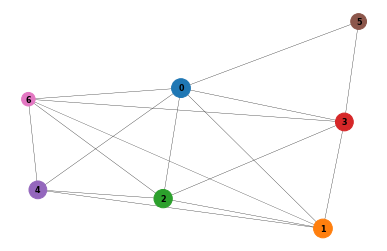

In [78]:
sc.pl.paga(adata, frameon=False,
           threshold=0.006,
           fontsize=8, node_size_scale=2, 
           max_edge_width=0.3, colorbar=False,
           save='_overview')

In [79]:
sc.tl.draw_graph(adata, init_pos='paga', maxiter=100)

In [96]:
# axs = sc.pl.draw_graph(
#     adata,
#     color=['clusters_coarse', 'time'],
#     right_margin=0, legend_loc='on data export', legend_fontsize=4, save=False, show=False)
# for ax in axs:
#     ax.set_frame_on(False)
#     ax.set_xlabel('')
#     ax.set_ylabel('')
#     ax.set_title('')

In [34]:
import velocyto as vcy

In [35]:
vlm = vcy.VelocytoLoom("/data/langenau/alvin_singlecell/01_rms_projects/02_human/data/cellranger_counts/20190418_MAST139_5Kcells_hg19/velocyto/20190418_MAST139_5Kcells_hg19.loom")

/data/pinello/SHARED_SOFTWARE/anaconda3/envs/alvin_py36_stream/lib/python3.6/site-packages/loompy/loom_validator.py:48: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(path) as f:


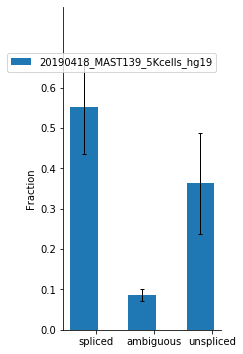

In [36]:
vlm.plot_fractions()

In [38]:
import numpy as np
np.unique(vlm.ca['Clusters'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [39]:
# Feature selection - enrichment score
vlm._normalize_S(relative_size=vlm.S.sum(0),
                 target_size=np.median(vlm.S.sum(0)))

In [ ]:
vlm.perform_PCA()